In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
dataset = xr.open_dataset('/Users/annadugoul/Documents/ERA5/5ci')
dataset

<xarray.Dataset>
Dimensions:    (longitude: 181, latitude: 101, time: 13248)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 ... 2018-08-31T23:00:00
Data variables:
    cin        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-24 14:35:35 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [14]:
dataarray = dataset.cin.resample(time='1D').interpolate('linear')
dataarray

<xarray.DataArray 'cin' (time: 5936, latitude: 101, longitude: 181)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan, ...,
         2.27061157e+01, 2.98933411e+01, 3.96746826e+01],
        [           nan,            nan,            nan, ...,
         3.50967407e+00, 2.31945801e+00, 1.18718872e+01],
        [           nan,            nan,            nan, ...,
         2.70092773e+00, 3.78436279e+00, 5.23400879e+00]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
...
        [           nan,            nan,            nan, ...,
         9.61347961e+01, 1.22579498e+02, 1.22259033e+02],
        [           nan,            nan,            nan, ...,
         9.33270569e+01, 1.23037292e+02, 1.15590637e+02],
        [           nan,            nan,            nan, ...,
         9.72640076e+01, 1.22747345e+02, 1.15041321e+02]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan, ...,
         1.00087006e+02, 1.09349518e+02, 1.03138916e+02],
        [           nan,            nan,            nan, ...,
         1.01567169e+02, 1.12569275e+02, 9.13585815e+01],
        [           nan,            nan,            nan, ...,
         1.05733002e+02, 1.15819550e+02, 9.00767822e+01]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 2002-06-02 ... 2018-08-31
Attributes:
    units:      J kg**-1
    long_name:  Convective inhibition

In [15]:
dataset.isnull()

<xarray.Dataset>
Dimensions:    (time: 13248, latitude: 101, longitude: 181)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2002-06-01 ... 2018-08-31T23:00:00
Data variables:
    cin        (time, latitude, longitude) bool True True True ... False False

In [16]:
t = dataarray.sel(time=slice('2013-7-4', '2013-7-9'))
t

<xarray.DataArray 'cin' (time: 6, latitude: 101, longitude: 181)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [4.87128754e+02, 4.89402405e+02, 4.78537659e+02, ...,
         1.14140991e+02, 1.17238678e+02, 1.02452240e+02],
        [5.28787170e+02, 5.19814575e+02, 4.83817444e+02, ...,
         1.11241699e+02, 1.13866333e+02, 9.88967590e+01],
        [5.70689697e+02, 5.03990479e+02, 4.58212006e+02, ...,
         1.13164398e+02, 1.08052460e+02, 9.51123962e+01]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
...
        [6.49749146e+01, 5.22637634e+01, 2.46898499e+01, ...,
         1.38220459e+02, 1.28378113e+02, 1.17360748e+02],
        [2.20041809e+01, 2.34996033e+01, 2.36217041e+01, ...,
         1.48902130e+02, 1.34436127e+02, 1.17376007e+02],
        [2.97712708e+01, 2.10123291e+01, 2.14243164e+01, ...,
         1.54349762e+02, 1.41867493e+02, 1.19680206e+02]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [           nan,            nan, 1.21618134e+02, ...,
         1.46033325e+01, 6.89727783e+00, 4.13531494e+00],
        [           nan,            nan,            nan, ...,
         3.18007812e+01, 2.75586548e+01, 2.51323853e+01],
        [           nan,            nan,            nan, ...,
         5.34997864e+01, 5.46442261e+01, 5.17754517e+01]]])
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 114.5 114.8 115.0
  * latitude   (latitude) float32 45.0 44.75 44.5 44.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2013-07-04 2013-07-05 ... 2013-07-09
Attributes:
    units:      J kg**-1
    long_name:  Convective inhibition

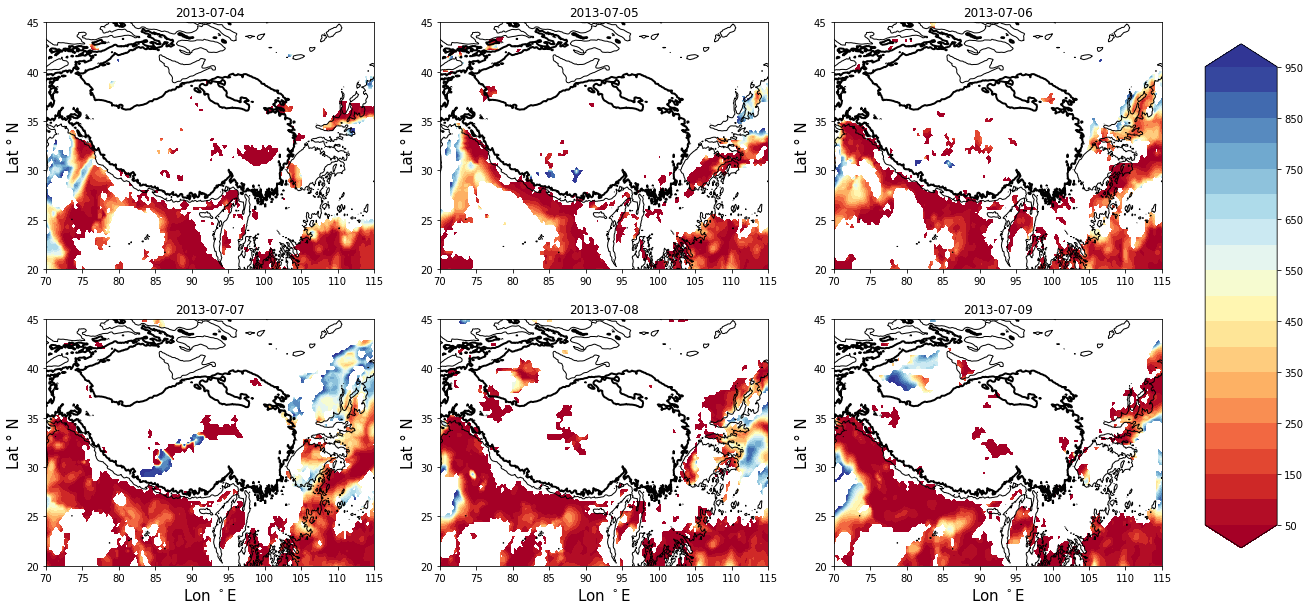

In [17]:
fig, ((ax1, ax2,ax3),(ax4,ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
out='/Users/annadugoul/Documents/Data_Thesis/Geopotential/0205june2002.png'
data = xr.open_dataset('/Users/annadugoul/Documents/Data_Thesis/GMTED2010_15n030_0125deg.nc')
lat = data.latitude
lon = data.longitude
elevations = data.elevation
ax1.set_xlim(70,115)
ax1.set_ylim(20,45)
ax2.set_xlim(70,115)
ax2.set_ylim(20,45)
ax3.set_xlim(70,115)
ax3.set_ylim(20,45)
ax4.set_xlim(70,115)
ax4.set_ylim(20,45)
ax5.set_xlim(70,115)
ax5.set_ylim(20,45)
ax6.set_xlim(70,115)
ax6.set_ylim(20,45)

m=ax1.contourf(t.longitude,t.latitude,t[0], cmap=plt.cm.RdYlBu, levels=20, extend='both')
m=ax2.contourf(t.longitude,t.latitude,t[1], cmap=plt.cm.RdYlBu, levels=20, extend='both')
m=ax3.contourf(t.longitude,t.latitude,t[2], cmap=plt.cm.RdYlBu, levels=20, extend='both')
m=ax4.contourf(t.longitude,t.latitude,t[3], cmap=plt.cm.RdYlBu, levels=20, extend='both')
m=ax5.contourf(t.longitude,t.latitude,t[4], cmap=plt.cm.RdYlBu, levels=20, extend='both')
m=ax6.contourf(t.longitude,t.latitude,t[5], cmap=plt.cm.RdYlBu, levels=20, extend='both')
ax1.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax1.contour(lon, lat, elevations, [900], cmap = 'Greys_r', linewidths = [1.0])
ax2.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax2.contour(lon, lat, elevations, [900], cmap = 'Greys_r', linewidths = [1.0])
ax3.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax3.contour(lon, lat, elevations, [900], cmap = 'Greys_r', linewidths = [1.0])
ax4.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax4.contour(lon, lat, elevations, [900], cmap = 'Greys_r', linewidths = [1.0])
ax5.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax5.contour(lon, lat, elevations, [900], cmap = 'Greys_r', linewidths = [1.0])
ax6.contour(lon, lat, elevations, [3000], cmap = 'Greys_r', linewidths = [2.0])
ax6.contour(lon, lat, elevations, [900], cmap = 'Greys_r', linewidths = [1.0])
cbar_ax = fig.add_axes([0.93, 0.15, 0.05, 0.7])
fig.colorbar(m,cax=cbar_ax)
ax1.set_title(str(t.time.values[0])[0:10])
ax2.set_title(str(t.time.values[1])[0:10])
ax3.set_title(str(t.time.values[2])[0:10])
ax4.set_title(str(t.time.values[3])[0:10])
ax5.set_title(str(t.time.values[4])[0:10])
ax6.set_title(str(t.time.values[5])[0:10])
ax1.set_ylabel('Lat ° N',  fontsize=15)
ax2.set_ylabel('Lat ° N',  fontsize=15)
ax3.set_ylabel('Lat ° N',  fontsize=15)
ax4.set_ylabel('Lat ° N',  fontsize=15)
ax5.set_ylabel('Lat ° N',  fontsize=15)
ax6.set_ylabel('Lat ° N',  fontsize=15)

ax4.set_xlabel('Lon $^\circ$E',  fontsize=15)
ax5.set_xlabel('Lon $^\circ$E',  fontsize=15)
ax6.set_xlabel('Lon $^\circ$E',  fontsize=15)

fig.subplots_adjust()
plt.savefig(out,bbox_inches = 'tight', transparent = False, facecolor = 'white')